In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [65]:
df = pd.read_csv('bigmart_train.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [66]:
from sklearn.preprocessing import LabelEncoder
# Explore the data
#print(df.head())
#print(df.describe())
#print(df.info())

# Check for missing values
print(df.isnull().sum())

# Fill missing values
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)
df['Outlet_Size'].fillna('Unknown', inplace=True)

# Encode categorical variables
df = pd.get_dummies(df, columns=['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type'])




# Preprocess the Item_Type column using label encoding
le = LabelEncoder()
df['Item_Type'] = le.fit_transform(df['Item_Type'])

# Preprocess the Outlet_Type column using label encoding
df['Outlet_Type'] = le.fit_transform(df['Outlet_Type'])
# Remove unnecessary columns
df.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1, inplace=True)
df.head()


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Type,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Size_Unknown,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3
0,9.30,0.016047,4,249.8092,1999,1,3735.1380,0,1,0,0,0,0,1,0,0,1,0,0
1,5.92,0.019278,14,48.2692,2009,2,443.4228,0,0,1,0,0,0,1,0,0,0,0,1
2,17.50,0.016760,10,141.6180,1999,1,2097.2700,0,1,0,0,0,0,1,0,0,1,0,0
3,19.20,0.000000,6,182.0950,1998,0,732.3800,0,0,1,0,0,0,0,0,1,0,0,1
4,8.93,0.000000,9,53.8614,1987,1,994.7052,0,1,0,0,0,1,0,0,0,0,0,1


In [67]:
# Split the data into training and testing sets
X = df.drop('Item_Outlet_Sales', axis=1)
y = df['Item_Outlet_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))


Mean squared error: 1202852.00
Coefficient of determination: 0.56


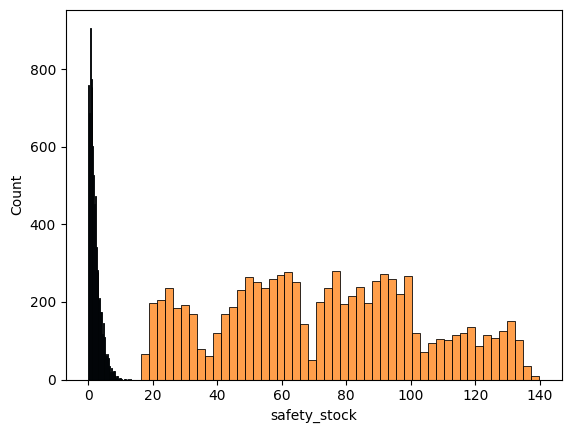

In [68]:
# Calculate safety stock levels
df['safety_stock'] = df['Item_Weight'] * df['Item_Visibility'] * 2.33

# Calculate reorder levels
df['reorder_level'] = df['safety_stock'] + df['Item_MRP'] * 0.5

# Visualize safety stock levels and reorder levels
sns.histplot(df['safety_stock'], bins=50)
sns.histplot(df['reorder_level'], bins=50)
plt.show()


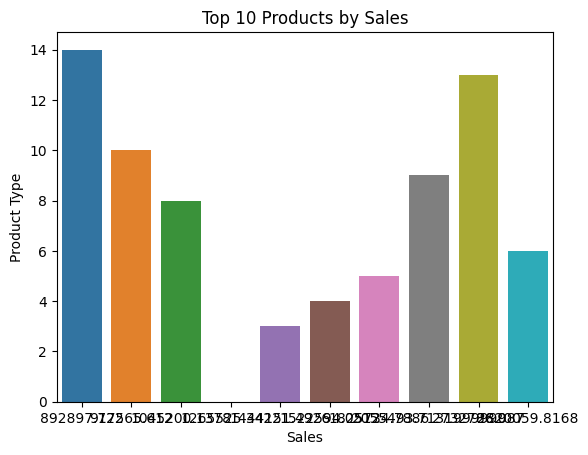

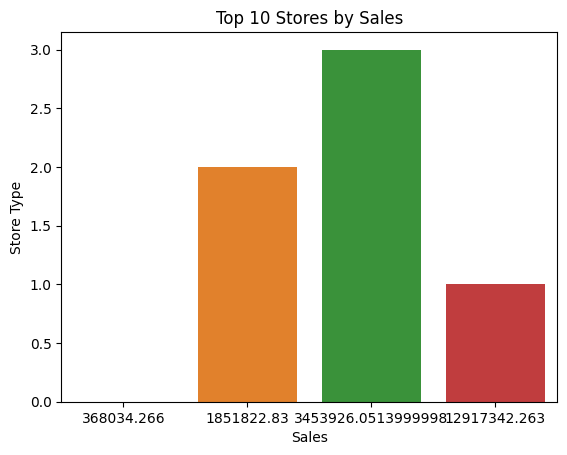

In [69]:
# Visualize the top 10 products with the highest sales
top_10_products = df.groupby('Item_Type')['Item_Outlet_Sales'].sum().sort_values(ascending=False)[:10]
sns.barplot(x=top_10_products.values, y=top_10_products.index)
plt.xlabel('Sales')
plt.ylabel('Product Type')
plt.title('Top 10 Products by Sales')
plt.show()

# Visualize the top 10 stores with the highest sales
top_10_stores = df.groupby('Outlet_Type')['Item_Outlet_Sales'].sum().sort_values(ascending=False)[:10]
sns.barplot(x=top_10_stores.values, y=top_10_stores.index)
plt.xlabel('Sales')
plt.ylabel('Store Type')
plt.title('Top 10 Stores by Sales')
plt.show()
